In [3]:
import pandas as pd

def select_train_test(df):
        all_groups = []

        grouped = df.groupby(['name', 'start'])

        for name_start, group in grouped:
                if len(group) < 13:  # 如果组内数据不足 13 行，则跳过
                    continue
                
                # 计算前 12 行的均值
                mean_value = group.iloc[:12]['predict'].mean()  # 假设 'value' 是需要计算的列
                # 取第 13 行的值
                thirteenth_value = group.iloc[12]['predict']
                
                # 计算差异率
                if mean_value != 0:  # 避免除以零的情况
                    difference_rate = abs(thirteenth_value - mean_value) / mean_value
                    
                    # 如果差异率小于等于 10%，则保留该组
                    if difference_rate <= 0.30:
                        all_groups.append(group)

        result_df = pd.concat(all_groups, ignore_index=True)

        return result_df

for month in range(202208, 202213):
    df = pd.read_csv('/home/ubuntu/Time-Series-Library-main/data/train_data/meizan_new_data/deep_train_mz_'+ str(month) + '.csv', encoding='utf_8_sig')
    df = select_train_test(df)
    df_name = df[df['start'] == month-100]['name'].drop_duplicates()
    df_name.to_csv('name' + str(month) + '.csv', encoding='utf_8_sig', index=False)
    print('finish',month)


for month in range(202301, 202313):
    df = pd.read_csv('/home/ubuntu/Time-Series-Library-main/data/train_data/meizan_new_data/deep_train_mz_'+ str(month) + '.csv', encoding='utf_8_sig')
    df = select_train_test(df)
    df_name = df[df['start'] == month-100]['name'].drop_duplicates()
    df_name.to_csv('name' + str(month) + '.csv', encoding='utf_8_sig', index=False)
    print('finish',month)


for month in range(202401, 202404):
    df = pd.read_csv('/home/ubuntu/Time-Series-Library-main/data/train_data/meizan_new_data/deep_train_mz_'+ str(month) + '.csv', encoding='utf_8_sig')
    df = select_train_test(df)
    df_name = df[df['start'] == month-100]['name'].drop_duplicates()
    df_name.to_csv('name' + str(month) + '.csv', encoding='utf_8_sig', index=False)
    print('finish',month)

In [4]:
import os

for month in range(202208, 202213):
    df1 = pd.read_csv('name' + str(month) + '.csv', encoding='utf_8_sig')
    df2 = pd.read_csv(str(month)+'_predict.csv', encoding='utf_8_sig')
    df1['month_predict'] = month
    df2['month_predict'] = month
    result = pd.concat([df1, df2], axis=1)
    result.to_csv('merge_'+ str(month) + '.csv', encoding='utf_8_sig', index=False)
    os.remove('name' + str(month) + '.csv')
    os.remove(str(month)+'_predict.csv')

for month in range(202301, 202313):
    df1 = pd.read_csv('name' + str(month) + '.csv', encoding='utf_8_sig')
    df2 = pd.read_csv(str(month)+'_predict.csv', encoding='utf_8_sig')
    df1['month_predict'] = month
    df2['month_predict'] = month
    result = pd.concat([df1, df2], axis=1)
    result.to_csv('merge_'+ str(month) + '.csv', encoding='utf_8_sig', index=False)
    os.remove('name' + str(month) + '.csv')
    os.remove(str(month)+'_predict.csv')

for month in range(202401, 202404):
    df1 = pd.read_csv('name' + str(month) + '.csv', encoding='utf_8_sig')
    df2 = pd.read_csv(str(month)+'_predict.csv', encoding='utf_8_sig')
    df1['month_predict'] = month
    df2['month_predict'] = month
    result = pd.concat([df1, df2], axis=1)
    result.to_csv('merge_'+ str(month) + '.csv', encoding='utf_8_sig', index=False)
    os.remove('name' + str(month) + '.csv')
    os.remove(str(month)+'_predict.csv')
    

In [5]:
df = pd.read_csv('/home/ubuntu/Time-Series-Library-main/data/meizan/6-门店区域信息.csv', encoding='utf_8_sig')
df = df[['name', 'code']]

for month in range(202208, 202213):
    df1 = pd.read_csv('merge_'+ str(month) + '.csv', encoding='utf_8_sig')
    # print(df1.shape)
    df2 = df1.merge(df, on='name')
    # print(df2.shape)
    # print(df2.head)
    df2.to_csv('result'+str(month)+'.csv', encoding='utf_8_sig')
    print('finish', month)
    os.remove('merge_'+ str(month) + '.csv')

for month in range(202301, 202313):
    df1 = pd.read_csv('merge_'+ str(month) + '.csv', encoding='utf_8_sig')
    # print(df1.shape)
    df2 = df1.merge(df, on='name')
    # print(df2.shape)
    # print(df2.head)
    df2.to_csv('result'+str(month)+'.csv', encoding='utf_8_sig')
    print('finish', month)
    os.remove('merge_'+ str(month) + '.csv')

for month in range(202401, 202404):
    df1 = pd.read_csv('merge_'+ str(month) + '.csv', encoding='utf_8_sig')
    # print(df1.shape)
    df2 = df1.merge(df, on='name')
    # print(df2.shape)
    # print(df2.head)
    df2.to_csv('result'+str(month)+'.csv', encoding='utf_8_sig')
    print('finish', month)
    os.remove('merge_'+ str(month) + '.csv')

In [6]:
import json

with open('/home/ubuntu/Time-Series-Library-main/data/meizan/MeiZan-StoreInfo.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

json_df = pd.DataFrame(data['RECORDS'], columns=['门店编码', '门店渠道'])
print(json_df.head)
json_df = json_df.rename(columns={'门店编码': 'code'})
json_df['code'] = json_df['code'].astype(str)

for month in range(202208, 202213):
    df1 = pd.read_csv('result'+ str(month) + '.csv', encoding='utf_8_sig')
    df1['code'] = df1['code'].astype(str) 
    # print(df1.shape)
    df2 = df1.merge(json_df, on='code')
    # print(df2.shape)
    # print(df2.head)
    df2.to_csv('final_1008_'+str(month)+'.csv', encoding='utf_8_sig')
    print('finish', month)
    os.remove('result'+ str(month) + '.csv')

for month in range(202301, 202313):
    df1 = pd.read_csv('result'+ str(month) + '.csv', encoding='utf_8_sig')
    df1['code'] = df1['code'].astype(str) 
    # print(df1.shape)
    df2 = df1.merge(json_df, on='code')
    # print(df2.shape)
    # print(df2.head)
    df2.to_csv('final_1008_'+str(month)+'.csv', encoding='utf_8_sig')
    print('finish', month)
    os.remove('result'+ str(month) + '.csv')

for month in range(202401, 202404):
    df1 = pd.read_csv('result'+ str(month) + '.csv', encoding='utf_8_sig')
    df1['code'] = df1['code'].astype(str) 
    # print(df1.shape)
    df2 = df1.merge(json_df, on='code')
    # print(df2.shape)
    # print(df2.head)
    df2.to_csv('final_1008_'+str(month)+'.csv', encoding='utf_8_sig')
    print('finish', month)
    os.remove('result'+ str(month) + '.csv')

In [7]:
import pandas as pd

all_df = []
for month in range(202208, 202213):
    df1 = pd.read_csv('final_1008_'+ str(month) + '.csv', encoding='utf_8_sig')
    # print(df1.shape)
    df1 = df1.dropna(how='any')  # 'any' 表示只要有任意一列是 NaN，该行就会被删除
    # print(df1.shape)
    all_df.append(df1)

for month in range(202301, 202313):
    df1 = pd.read_csv('final_1008_'+ str(month) + '.csv', encoding='utf_8_sig')
    # print(df1.shape)
    df1 = df1.dropna(how='any')  # 'any' 表示只要有任意一列是 NaN，该行就会被删除
    # print(df1.shape)
    all_df.append(df1)

for month in range(202401, 202404):
    df1 = pd.read_csv('final_1008_'+ str(month) + '.csv', encoding='utf_8_sig')
    # print(df1.shape)
    df1 = df1.dropna(how='any')  # 'any' 表示只要有任意一列是 NaN，该行就会被删除
    # print(df1.shape)
    all_df.append(df1)

df_new = pd.concat(all_df, axis=0)
# print(df_new.shape)
df_new.to_csv('result_0.3.csv', encoding='utf_8_sig', index=False)
    
    # print(df1.shape)
    # df2 = df1.merge(df, on='name')
    # print(df2.shape)
    # print(df2.head)
    # df2.to_csv('result'+str(month)+'.csv', encoding='utf_8_sig')
    # print('finish', month)
    # os.remove('merge_'+ str(month) + '.csv')

In [8]:
import numpy as np
# print(df_new.columns)
df_new['accuracy'] = 1 - abs(df_new['true'] - df_new['predict'])/df_new['true']
df_new = df_new[df_new['accuracy'] >= 0]
df_new['store_accuracy'] = np.where(df_new['accuracy'] > 0.8, 1, 0)
# print(df_new.head)
result = df_new.groupby(['门店渠道', 'month_predict']).agg(
    accuracy_mean=('accuracy', 'mean'),
    store_accuracy_sum=('store_accuracy', 'sum'),
    record_count=('accuracy', 'count')
).reset_index()
result['store_accuracy'] = result['store_accuracy_sum'] / result['record_count']


# 打印结果
result.to_csv('result_update_0.3.csv', encoding='utf_8_sig', index=False)
# print(df_new.head)

In [2]:
import pandas as pd

df = pd.read_csv('/home/ubuntu/Time-Series-Library-main/result/clean_1008_0.3.csv', encoding='utf_8_sig')
print(df.columns)

idx = df.groupby(' month')[' store_acc'].idxmax()

df_max_store_accuracy = df.loc[idx]

df_max_store_accuracy.to_csv('parameters_selected_0.3.csv', encoding='utf_8_sig')

In [27]:
import pandas as pd

def convert_back(date_str):
    year = int(date_str[:4])
    month = int(date_str[4:6])
    return pd.to_datetime(f"{year}-{month}-01").strftime('%b-%y')

df2 = pd.read_csv('/home/ubuntu/Time-Series-Library-main/data/meizan/label_clean_50.csv', encoding='utf_8_sig')
df2 = df2.rename(columns={"门店名（MJ统一）": 'name', "年月": 'month'})

# 筛选出 df2 中 label 为 1 的行
df2_filtered = df2[df2['label'] == 1][['name', 'month']].copy()
# df2_filtered['month'] = df2_filtered['month'].apply(lambda x: pd.to_datetime(x).strftime('%b-%y'))

# 读取数据
for i in range(202301, 202313):
    df = pd.read_csv('data/train_data/meizan_new_data/deep_train_mz_202308.csv', encoding='utf_8_sig')
    df['month'] = df['month'].astype(str).apply(convert_back)
    print(df.shape)

    merged_df = pd.merge(df, df2_filtered, on=['name', 'month'], how='inner')
    print(i, merged_df.shape)

# 删除 df 中与 df2_filtered 中的 name 和 month 匹配的行
# before_length = len(df)
# df_test = df.set_index(['name', 'month']).index.isin(df2_filtered.set_index(['name', 'month']).index)
# print(df_test)
                                                    
# df = df[~df.set_index(['name', 'month']).index.isin(df2_filtered.set_index(['name', 'month']).index)]
# after_length = len(df)

# 输出结果
# print(df.shape)

In [3]:
import pandas as pd

# 初始化一个列表来存储符合条件的结果
all_groups = []

for i in range(202301, 202302):
    df = pd.read_csv('data/train_data/meizan_new_data/deep_train_mz_202308.csv', encoding='utf_8_sig')
    print(df.shape)
    print(df['start'].value_counts())
    
    # 分组
    grouped = df.groupby(['name', 'start'])

    for name_start, group in grouped:
        if len(group) < 13:  # 如果组内数据不足 13 行，则跳过
            continue
        
        # 计算前 12 行的均值
        mean_value = group.iloc[:12]['predict'].mean()  # 假设 'value' 是需要计算的列
        # 取第 13 行的值
        thirteenth_value = group.iloc[12]['predict']
        
        # 计算差异率
        if mean_value != 0:  # 避免除以零的情况
            difference_rate = abs(thirteenth_value - mean_value) / mean_value
            
            # 如果差异率小于等于 10%，则保留该组
            if difference_rate <= 0.30:
                all_groups.append(group)

    break

# 合并所有符合条件的组
result_df = pd.concat(all_groups, ignore_index=True)
print(result_df.shape)
print(result_df['start'].value_counts())

# 输出结果
# result_df.to_csv(f'filtered_data_{i}.csv', index=False)

In [3]:
import pandas as pd

def select_train_test(df):
        all_groups = []

        grouped = df.groupby(['name', 'start'])

        for name_start, group in grouped:
                if len(group) < 13:  # 如果组内数据不足 13 行，则跳过
                    continue
                
                # 计算前 12 行的均值
                mean_value = group.iloc[:12]['predict'].mean()  # 假设 'value' 是需要计算的列
                # 取第 13 行的值
                thirteenth_value = group.iloc[12]['predict']
                
                # 计算差异率
                if mean_value != 0:  # 避免除以零的情况
                    difference_rate = abs(thirteenth_value - mean_value) / mean_value
                    
                    # 如果差异率小于等于 10%，则保留该组
                    if difference_rate <= 0.30:
                        all_groups.append(group)

        result_df = pd.concat(all_groups, ignore_index=True)

        return result_df

for month in range(202208, 202213):
    df = pd.read_csv('/home/ubuntu/Time-Series-Library-main/data/train_data/meizan_new_data/deep_train_mz_'+ str(month) + '.csv', encoding='utf_8_sig')
    print(df.shape)
    new_df = select_train_test(df)
    print(new_df.shape)

for month in range(202301, 202313):
    df = pd.read_csv('/home/ubuntu/Time-Series-Library-main/data/train_data/meizan_new_data/deep_train_mz_'+ str(month) + '.csv', encoding='utf_8_sig')
    print(df.shape)
    new_df = select_train_test(df)
    print(new_df.shape)

for month in range(202401, 202404):
    df = pd.read_csv('/home/ubuntu/Time-Series-Library-main/data/train_data/meizan_new_data/deep_train_mz_'+ str(month) + '.csv', encoding='utf_8_sig')
    print(df.shape)
    new_df = select_train_test(df)
    print(new_df.shape)


权重数据热力图分析
正在加载数据...
数据形状: (168, 4)
列名: ['epoch', 'month', 'enc_core_second_col', 'dec_core_second_col']
唯一月份: [202208, 202209, 202210, 202211, 202212, 202301, 202302, 202303]
每个月份的数据量:
month
202208    21
202209    21
202210    21
202211    21
202212    21
202301    21
202302    21
202303    21
Name: count, dtype: int64

数据预处理完成

数据样例（前10行）:
   epoch   month  enc_core_second_col  dec_core_second_col  data_index
0      8  202208             0.153568             0.160601           1
1      8  202208             0.146020             0.147190           2
2      8  202208             0.140472             0.146225           3
3      8  202208             0.140224             0.142008           4
4      8  202208             0.147912             0.128879           5
5      8  202208             0.143973             0.142420           6
6      8  202208             0.150871             0.135943           7
7      8  202208             0.133290             0.142587           8
8      8  202208  

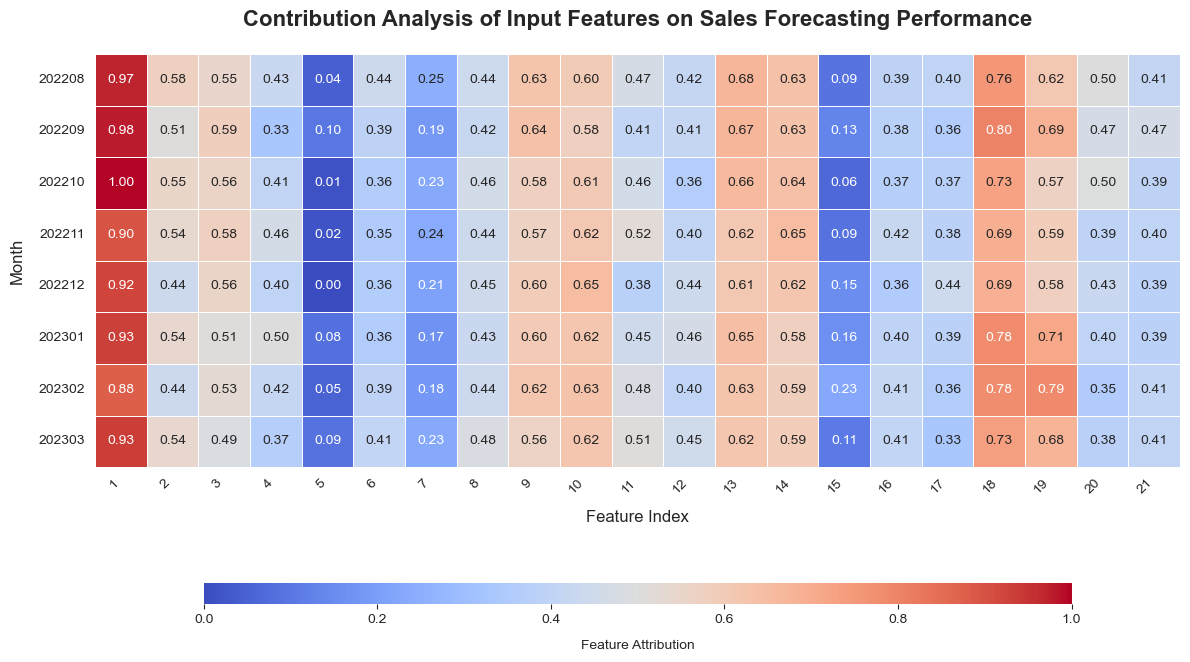

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import os

df = pd.read_csv('/Users/inaya/Desktop/小论文/2-Saleformer/实验结果/0109-weights_second_col_summary.csv')

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
权重数据热力图分析
保留每个月份的原始数据，生成编码器和解码器权重的热力图
"""
def load_and_preprocess_data(file_path):
    """
    加载数据并进行预处理
    
    Args:
        file_path: 数据文件路径
        
    Returns:
        df_with_index: 预处理后的数据框，包含数据索引
    """
    print("正在加载数据...")
    # 读取数据文件
    df = pd.read_csv(file_path)
    
    print(f"数据形状: {df.shape}")
    print(f"列名: {df.columns.tolist()}")
    print(f"唯一月份: {sorted(df['month'].unique())}")
    
    # 检查每个月份的数据量
    month_counts = df['month'].value_counts().sort_index()
    print("每个月份的数据量:")
    print(month_counts)
    
    # 为每个月份的数据添加索引（1-21）
    df_with_index = df.copy()
    df_with_index['data_index'] = df_with_index.groupby('month').cumcount() + 1
    
    print("\n数据预处理完成")
    return df_with_index

def min_max_scaling(series):
    """
    对数据进行0-1标准化
    
    Args:
        series: 需要标准化的Series
        
    Returns:
        标准化后的Series
    """
    return (series - series.min()) / (series.max() - series.min())

def prepare_heatmap_data(df, value_col):
    """
    准备热力图数据
    
    Args:
        df: 数据框
        value_col: 需要可视化的列名
        
    Returns:
        heatmap_data: 热力图数据（透视表格式）
    """
    # 对数据进行0-1标准化
    scaled_col = f'{value_col}_scaled'
    df[scaled_col] = min_max_scaling(df[value_col])
    
    # 创建透视表
    heatmap_data = df.pivot(index='data_index', columns='month', values=scaled_col)
    
    print(f"\n{value_col} 热力图数据形状: {heatmap_data.shape}")
    print(f"数据范围: {heatmap_data.min().min():.4f} 到 {heatmap_data.max().max():.4f}")
    
    return heatmap_data

import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(heatmap_data, title, figsize=(12, 8), output_path=None):
    """
    绘制热力图（横纵坐标已对调）
    
    Args:
        heatmap_data: 热力图数据（透视表格式）
        title: 图表标题
        figsize: 图表尺寸
        output_path: 输出文件路径，如为None则显示图表
    """
    plt.figure(figsize=figsize)
    
    cmap = 'coolwarm'
    
    # 转置数据，实现横纵坐标对调
    transposed_data = heatmap_data.T
    
    # 绘制热力图（使用转置后的数据）
    ax = sns.heatmap(
        transposed_data,  # 核心修改：使用转置后的数据
        annot=True,
        fmt=".2f",
        cmap=cmap,
        cbar=True,
        cbar_kws={
            'orientation': 'horizontal',  # 颜色条改为水平
            'pad': 0.15,                  # 颜色条与热力图的间距
            'shrink': 0.8,                # 颜色条长度缩放（适配图表）
            'aspect': 40                  # 水平颜色条的宽高比（数值越大越扁）
        },
        linewidths=0.5,
        linecolor='white',
        square=True,
        # X轴改为原数据的索引（数据索引）
        xticklabels=transposed_data.columns,
        # Y轴改为原数据的列（月份，保持格式处理）
        yticklabels=transposed_data.index
    )
    
    # 调整坐标轴标签（对换X/Y轴的文字说明）
    plt.title(title, fontsize=16, pad=20, fontweight='bold')
    plt.xlabel('Feature Index', fontsize=12, labelpad=10)  # 原Y轴标签
    plt.ylabel('Month', fontsize=12, labelpad=10)      # 原X轴标签
    
    # 调整Y轴标签角度（原X轴的旋转逻辑迁移到Y轴）
    plt.yticks(rotation=0)  # Y轴标签保持水平，更易阅读
    plt.xticks(rotation=45, ha='right')  # X轴标签仍旋转45度
    
    # 美化颜色条（保持不变）
    cbar = ax.collections[0].colorbar
    cbar.set_label('Feature Attribution', fontsize=10, labelpad=10)
    
    plt.tight_layout()
    
    # 保存或显示图表
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"热力图已保存至: {output_path}")
    else:
        plt.show()

def main(file_path, output_dir='heatmap_outputs'):
    """
    主函数：执行完整的数据分析流程
    
    Args:
        file_path: 数据文件路径
        output_dir: 输出目录
    """
    print("=" * 60)
    print("权重数据热力图分析")
    print("=" * 60)
    
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    # 加载和预处理数据
    df = load_and_preprocess_data(file_path)
    
    # 显示数据样例
    print("\n数据样例（前10行）:")
    print(df[['epoch', 'month', 'enc_core_second_col', 'dec_core_second_col', 'data_index']].head(10))
    
    # 准备编码器热力图数据
    enc_heatmap_data = prepare_heatmap_data(df, 'enc_core_second_col')
    
    # 准备解码器热力图数据
    dec_heatmap_data = prepare_heatmap_data(df, 'dec_core_second_col')
    
    # 绘制编码器热力图
    # enc_output_path = os.path.join(output_dir, 'encoder_weights_heatmap.png')
    # plot_heatmap(
    #     enc_heatmap_data,
    #     'Contribution Analysis of Encoder Input Features on Sales Forecasting Performance',
    #     output_path=enc_output_path
    # )
    
    # 绘制解码器热力图
    dec_output_path = os.path.join(output_dir, 'decoder_weights_heatmap.png')
    plot_heatmap(
        dec_heatmap_data,
        'Contribution Analysis of Input Features on Sales Forecasting Performance',
        output_path=dec_output_path
    )
    
    print("\n" + "=" * 60)
    print("分析完成！")
    # print(f"编码器热力图: {enc_output_path}")
    print(f"解码器热力图: {dec_output_path}")
    print("=" * 60)

if __name__ == "__main__":
    # 数据文件路径（请根据实际情况修改）
    data_file = '/Users/inaya/Desktop/小论文/2-Saleformer/实验结果/0109-weights_second_col_summary.csv'
    
    # 执行分析
    main(data_file)

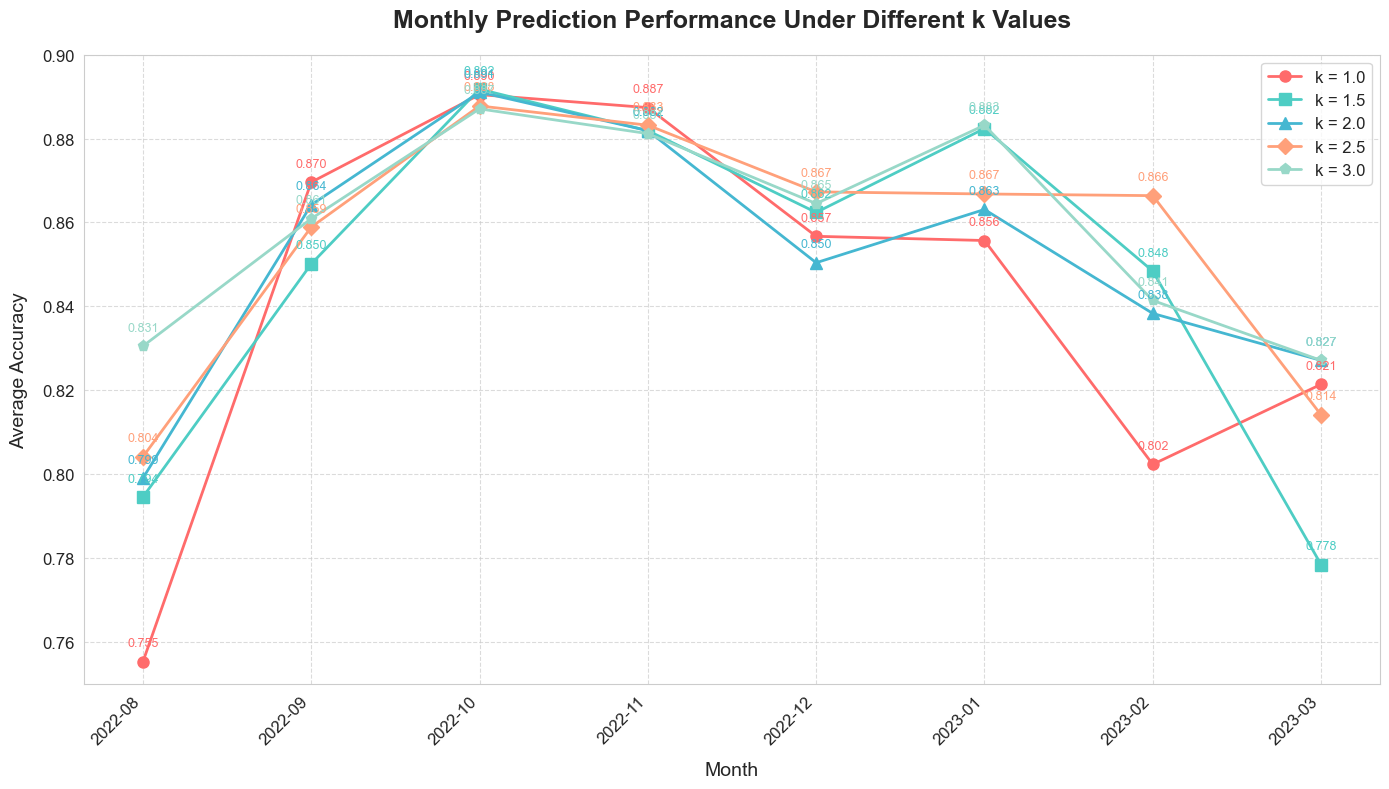

各k值的总体平均准确率:
   loss_k  store_acc
1     1.5     0.7924
3     2.5     0.7894
4     3.0     0.7860
2     2.0     0.7805
0     1.0     0.7674

每月各k值的平均准确率:
loss_k        1.0     1.5     2.0     2.5     3.0
month_str                                        
2022-08    0.7552  0.7945  0.7990  0.8041  0.8305
2022-09    0.8696  0.8501  0.8642  0.8589  0.8609
2022-10    0.8905  0.8918  0.8911  0.8878  0.8871
2022-11    0.8874  0.8819  0.8819  0.8832  0.8812
2022-12    0.8567  0.8624  0.8504  0.8673  0.8645
2023-01    0.8557  0.8824  0.8631  0.8668  0.8832
2023-02    0.8023  0.8484  0.8383  0.8664  0.8414
2023-03    0.8214  0.7784  0.8271  0.8141  0.8271


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('/Users/inaya/Desktop/小论文/2-Saleformer/实验结果/0108-k_value_experiment.csv')

# 数据处理
# 1. 按月和k值分组计算最大准确率
monthly_k_accuracy = df.groupby(['month', 'loss_k'])['store_acc'].max().reset_index()

# 2. 将月份转换为更易读的格式 (YYYY-MM)
monthly_k_accuracy['month_str'] = monthly_k_accuracy['month'].astype(str)
monthly_k_accuracy['month_str'] = monthly_k_accuracy['month_str'].str[:4] + '-' + monthly_k_accuracy['month_str'].str[4:]  # 修复：添加分隔符-

# 3. 按月份排序
monthly_k_accuracy = monthly_k_accuracy.sort_values('month')

# 4. 获取唯一的k值和月份
k_values = sorted(df['loss_k'].unique())
months = sorted(df['month'].unique())

# 创建折线图
plt.figure(figsize=(14, 8))

# 为每个k值绘制一条折线
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
markers = ['o', 's', '^', 'D', 'p']

for i, k in enumerate(k_values):
    # 筛选当前k值的数据
    k_data = monthly_k_accuracy[monthly_k_accuracy['loss_k'] == k]
    
    # 绘制折线
    plt.plot(k_data['month_str'], k_data['store_acc'], 
             marker=markers[i], 
             linestyle='-', 
             linewidth=2,
             markersize=8,
             label=f'k = {k}',
             color=colors[i])

# 添加标题和标签
# 修改1：添加fontweight='bold'参数将标题加粗
plt.title('Monthly Prediction Performance Under Different k Values', 
          fontsize=18, 
          pad=20,
          fontweight='bold')  # 标题加粗关键参数
plt.xlabel('Month', fontsize=14, labelpad=10)
plt.ylabel('Average Accuracy', fontsize=14, labelpad=10)

# 添加网格
plt.grid(True, linestyle='--', alpha=0.7)

# 添加图例
plt.legend(fontsize=12, loc='best')

# 旋转x轴标签
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 修改2：缩短Y轴数值范围（从原来的0.7-0.9调整为0.75-0.88，你可根据实际数据调整）
# 如果你想更紧凑，可以进一步调整为 0.78-0.86 等
plt.ylim(0.75, 0.9)  # 缩短后的Y轴范围

# 添加数据标签
for i, k in enumerate(k_values):
    k_data = monthly_k_accuracy[monthly_k_accuracy['loss_k'] == k]
    for x, y in zip(k_data['month_str'], k_data['store_acc']):
        plt.text(x, y+0.003, f'{y:.3f}', 
                 ha='center', va='bottom', 
                 fontsize=9, 
                 color=colors[i])

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

# 打印统计信息
print("各k值的总体平均准确率:")
overall_accuracy = df.groupby('loss_k')['store_acc'].mean().reset_index()
overall_accuracy = overall_accuracy.sort_values('store_acc', ascending=False)
print(overall_accuracy.round(4))

print("\n每月各k值的平均准确率:")
pivot_table = monthly_k_accuracy.pivot(index='month_str', columns='loss_k', values='store_acc')
print(pivot_table.round(4))

# todo 待修改统计值和图片标题、横纵坐标名称、月份格式